In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

In [2]:
def load_house_images(data_path, house_count, image_size):
    house_images = np.zeros((house_count, 2 * image_size[0], 2 * image_size[1], 3),
                             dtype = "uint8")
    for i in range(house_count):
        bathroom = image.load_img("./{}/{}_bathroom.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, 0:image_size[0], 0:image_size[1], :] = bathroom
        bedroom = image.load_img("./{}/{}_bedroom.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, 0:image_size[0], image_size[1]:(2 * image_size[1]), :] = bedroom
        frontal = image.load_img("./{}/{}_frontal.jpg".format(data_path, i + 1),
                                  target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), 0:image_size[1], :] = frontal
        kitchen = image.load_img("./{}/{}_kitchen.jpg".format(data_path, i + 1),
                                 target_size = image_size)
        house_images[i, image_size[0]:(2 * image_size[0]), image_size[1]:(2 * image_size[1]), :] = kitchen
    return house_images

def load_house_prices(data_path):
    houses_info = np.loadtxt("./{}/HousesInfo.txt".format(data_path))
    return houses_info[:, 4]

In [3]:
house_images = load_house_images("HD", 535, (128, 128))
print(house_images.shape)

(535, 256, 256, 3)


In [4]:
house_prices = load_house_prices("HD")
print(house_prices.shape)

(535,)


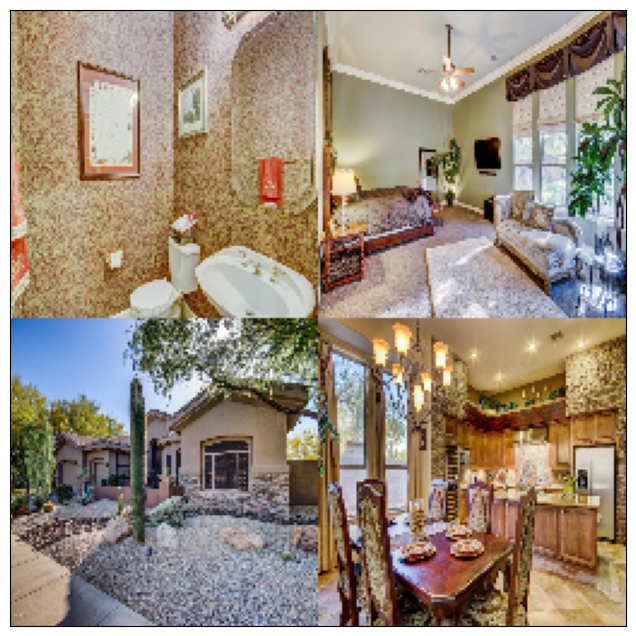

869500.0


In [5]:
#display the first house's picture 
plt.figure(figsize = (8, 8))
plt.imshow(house_images[0, :, :, :])
plt.xticks([])
plt.yticks([])
plt.show()
#display the first house's price 
print(house_prices[0])

In [28]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(house_images, house_prices, test_size=0.2, random_state=42)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

(428, 256, 256, 3)
(428,)
(107, 256, 256, 3)
(107,)


In [29]:
Xtrain = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1],
                         Xtrain.shape[2], 3)) / 255.0
Xtest = Xtest.reshape((Xtest.shape[0], Xtest.shape[1],
                       Xtest.shape[2], 3)) / 255.0
print(Xtrain.shape)
print(Xtest.shape)

(428, 256, 256, 3)
(107, 256, 256, 3)


In [32]:
from sklearn.model_selection import train_test_split

Xlearn, Xval, ylearn, yval = train_test_split(Xtrain, ytrain,
                                              stratify = None,
                                              test_size = 0.2,
                                              random_state = 42,
                                              shuffle = True)

print(Xlearn.shape)
print(Xval.shape)
print(ylearn.shape)
print(yval.shape)

(342, 256, 256, 3)
(86, 256, 256, 3)
(342,)
(86,)


In [37]:
from tensorflow import keras

CNN_model = keras.models.Sequential([
    keras.layers.Input(shape=(Xlearn.shape[1], Xlearn.shape[2], Xlearn.shape[3])),
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1),
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    keras.layers.Conv2D(filters=8, kernel_size=(2, 2), strides=1),
    keras.layers.Conv2D(filters=8, kernel_size=(2, 2), strides=1),
    keras.layers.Activation("relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)  # Linear activation for regression output
])

CNN_model.summary()

keras.utils.plot_model(CNN_model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 conv2d_6 (Conv2D)           (None, 252, 252, 8)       584       
                                                                 
 activation_2 (Activation)   (None, 252, 252, 8)       0         
                                                                 
 dropout_1 (Dropout)         (None, 252, 252, 8)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 8)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 8)       264       
                                                      

In [40]:
CNN_model.compile(optimizer="adam", loss="mean_squared_error")

In [41]:
cnn_history = CNN_model.fit(Xlearn, ylearn, epochs=10, verbose=1, validation_data=(Xval, yval))

Epoch 1/10
11/11 [==============================] - 9s 745ms/step - loss: 682886430720.0000 - val_loss: 502049767424.0000
Epoch 2/10
11/11 [==============================] - 9s 786ms/step - loss: 682827317248.0000 - val_loss: 501963784192.0000
Epoch 3/10
11/11 [==============================] - 9s 775ms/step - loss: 682521395200.0000 - val_loss: 501614313472.0000
Epoch 4/10
11/11 [==============================] - 9s 839ms/step - loss: 681306292224.0000 - val_loss: 500343209984.0000
Epoch 5/10
11/11 [==============================] - 9s 824ms/step - loss: 677205114880.0000 - val_loss: 496305405952.0000
Epoch 6/10
11/11 [==============================] - 9s 839ms/step - loss: 664571740160.0000 - val_loss: 484660346880.0000
Epoch 7/10
11/11 [==============================] - 9s 833ms/step - loss: 631013179392.0000 - val_loss: 455016087552.0000
Epoch 8/10
11/11 [==============================] - 9s 856ms/step - loss: 552570388480.0000 - val_loss: 390436421632.0000
Epoch 9/10
11/11 [======

In [44]:
from sklearn.preprocessing import MinMaxScaler

# WİTH NORMALİZER
scaler = MinMaxScaler()
ylearn_normalized = scaler.fit_transform(ylearn.reshape(-1, 1))
yval_normalized = scaler.transform(yval.reshape(-1, 1))

CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(Xlearn.shape[1], Xlearn.shape[2], Xlearn.shape[3])),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2), strides=1),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(2, 2), strides=1),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)  # Linear activation for regression output
])

# Compile the Model
CNN_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss="mean_squared_error")

# Train the Model
cnn_history = CNN_model.fit(Xlearn, ylearn_normalized, epochs=50, batch_size=32,
                            verbose=1, validation_data=(Xval, yval_normalized))


Epoch 1/50
11/11 [==============================] - 9s 774ms/step - loss: 0.0381 - val_loss: 0.0083
Epoch 2/50
11/11 [==============================] - 8s 759ms/step - loss: 0.0101 - val_loss: 0.0046
Epoch 3/50
11/11 [==============================] - 9s 790ms/step - loss: 0.0096 - val_loss: 0.0056
Epoch 4/50
11/11 [==============================] - 9s 778ms/step - loss: 0.0101 - val_loss: 0.0044
Epoch 5/50
11/11 [==============================] - 9s 810ms/step - loss: 0.0104 - val_loss: 0.0062
Epoch 6/50
11/11 [==============================] - 9s 795ms/step - loss: 0.0108 - val_loss: 0.0077
Epoch 7/50
11/11 [==============================] - 9s 796ms/step - loss: 0.0105 - val_loss: 0.0060
Epoch 8/50
11/11 [==============================] - 9s 814ms/step - loss: 0.0104 - val_loss: 0.0056
Epoch 9/50
11/11 [==============================] - 9s 808ms/step - loss: 0.0099 - val_loss: 0.0053
Epoch 10/50
11/11 [==============================] - 9s 818ms/step - loss: 0.0095 - val_loss: 0.0051

In [45]:
from tensorflow import keras

MLP_model = keras.models.Sequential([
    keras.layers.Input(shape=(Xlearn.shape[1], Xlearn.shape[2], Xlearn.shape[3])),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1)  # Linear activation for regression output
])

MLP_model.summary()

keras.utils.plot_model(MLP_model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 196608)            0         
                                                                 
 dense_10 (Dense)            (None, 200)               39321800  
                                                                 
 dense_11 (Dense)            (None, 16)                3216      
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 39,325,033
Trainable params: 39,325,033
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [46]:
MLP_model.compile(optimizer="adam",
                  loss="mean_squared_error",
                  metrics=["mean_absolute_error"]) 

In [47]:
# learned network
mlp_history = MLP_model.fit(Xlearn, ylearn, epochs = 10,
                            verbose = 1, 
                            validation_data = (Xval, yval))

Epoch 1/10
11/11 [==============================] - 6s 517ms/step - loss: 682876403712.0000 - mean_absolute_error: 599815.7500 - val_loss: 502022144000.0000 - val_mean_absolute_error: 593668.0625
Epoch 2/10
11/11 [==============================] - 6s 521ms/step - loss: 682817814528.0000 - mean_absolute_error: 599768.2500 - val_loss: 501942976512.0000 - val_mean_absolute_error: 593601.6875
Epoch 3/10
11/11 [==============================] - 6s 517ms/step - loss: 682717806592.0000 - mean_absolute_error: 599684.6875 - val_loss: 501813215232.0000 - val_mean_absolute_error: 593492.8750
Epoch 4/10
11/11 [==============================] - 6s 507ms/step - loss: 682559602688.0000 - mean_absolute_error: 599552.4375 - val_loss: 501616672768.0000 - val_mean_absolute_error: 593328.0625
Epoch 5/10
11/11 [==============================] - 6s 507ms/step - loss: 682321182720.0000 - mean_absolute_error: 599361.1875 - val_loss: 501338537984.0000 - val_mean_absolute_error: 593094.8125
Epoch 6/10
11/11 [==

In [49]:
# Normalize the Target Values 
scaler = MinMaxScaler()
ylearn_normalized = scaler.fit_transform(ylearn.reshape(-1, 1))
yval_normalized = scaler.transform(yval.reshape(-1, 1))

# Build the MLP Model
MLP_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(Xlearn.shape[1], Xlearn.shape[2], Xlearn.shape[3])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)  # Linear activation for regression output
])

# Compile the Model
MLP_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss="mean_squared_error")

# Train the Model
mlp_history = MLP_model.fit(Xlearn, ylearn_normalized, epochs=50, batch_size=32,
                            verbose=1, validation_data=(Xval, yval_normalized))


Epoch 1/50
11/11 [==============================] - 6s 526ms/step - loss: 0.0689 - val_loss: 0.0229
Epoch 2/50
11/11 [==============================] - 6s 516ms/step - loss: 0.0147 - val_loss: 0.0134
Epoch 3/50
11/11 [==============================] - 6s 504ms/step - loss: 0.0130 - val_loss: 0.0052
Epoch 4/50
11/11 [==============================] - 6s 513ms/step - loss: 0.0091 - val_loss: 0.0040
Epoch 5/50
11/11 [==============================] - 6s 515ms/step - loss: 0.0081 - val_loss: 0.0040
Epoch 6/50
11/11 [==============================] - 6s 506ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 7/50
11/11 [==============================] - 6s 511ms/step - loss: 0.0069 - val_loss: 0.0049
Epoch 8/50
11/11 [==============================] - 6s 511ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 9/50
11/11 [==============================] - 6s 507ms/step - loss: 0.0066 - val_loss: 0.0045
Epoch 10/50
11/11 [==============================] - 6s 523ms/step - loss: 0.0068 - val_loss: 0.0037

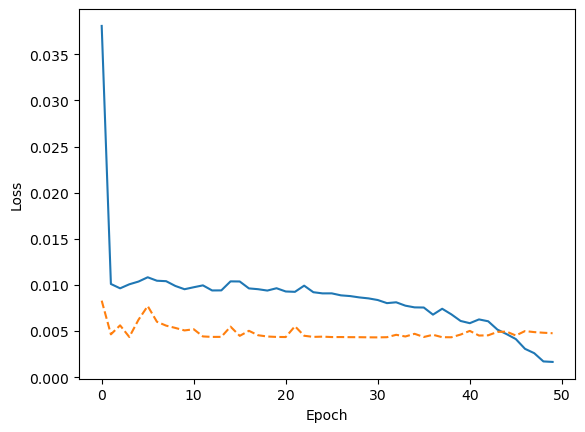

In [51]:
plt.plot(cnn_history.history["loss"])
plt.plot(cnn_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


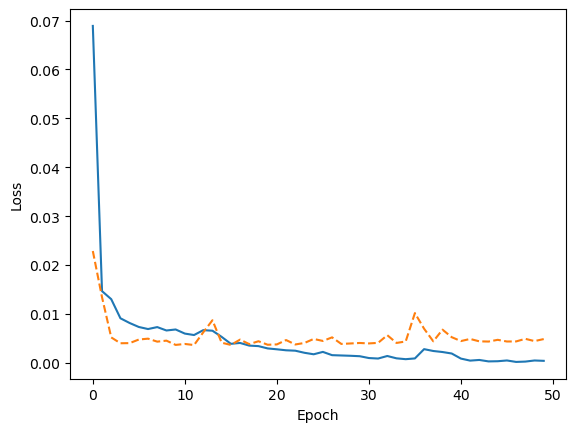

In [52]:
plt.plot(mlp_history.history["loss"])
plt.plot(mlp_history.history["val_loss"], "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [56]:

XtrainT = Xtrain.reshape((Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2], 3))
XtestT = Xtest.reshape((Xtest.shape[0], Xtest.shape[1], Xtest.shape[2], 3))
ytrainT = ytrain
ytestT = ytest

XtrainM = Xtrain
XtestM = Xtest
ytrainM = ytrain
ytestM = ytest

print(XtrainT.shape)  
print(XtestT.shape)   
print(XtrainM.shape)  
print(XtestM.shape) 

(428, 256, 256, 3)
(107, 256, 256, 3)
(428, 256, 256, 3)
(107, 256, 256, 3)


In [58]:
from sklearn.model_selection import train_test_split

XlearnT, XvalT, ylearnT, yvalT = train_test_split(XtrainT, ytrainT,
                                                  test_size = 0.2,
                                                  shuffle = True,
                                                  stratify = None,
                                                  random_state = 1234)
XlearnM, XvalM, ylearnM, yvalM = train_test_split(XtrainM, ytrainM,
                                                  test_size = 0.2,
                                                  shuffle = True,
                                                  stratify = None,
                                                  random_state = 1234)
print(XlearnT.shape)
print(XvalT.shape)
print(XtestT.shape)
print(XlearnM.shape)
print(XvalM.shape)

(342, 256, 256, 3)
(86, 256, 256, 3)
(107, 256, 256, 3)
(342, 256, 256, 3)
(86, 256, 256, 3)


In [65]:
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential, Model

# Encoder part
inputLayer = keras.layers.Input(name="main_input", shape=(XtrainM.shape[1], XtrainM.shape[2], XtrainM.shape[3]))
tempLayer = keras.layers.Flatten(name="flatten")(inputLayer)
tempLayer = keras.layers.Dense(128, name="first_enc_relu", activation="relu")(tempLayer)
tempLayer = keras.layers.Dense(64, name="second_enc_relu", activation="relu")(tempLayer)
encoded = keras.layers.Dense(16, name="bottleneck", activation="relu")(tempLayer)

# Decoder part
tempLayer = keras.layers.Dense(64, name="first_dec_relu", activation="relu")(encoded)
tempLayer = keras.layers.Dense(128, name="second_dec_relu", activation="relu")(tempLayer)
tempLayer = keras.layers.Dense(256 * 256 * 3, name="dec_sigmoid", activation="sigmoid")(tempLayer)
decoded = keras.layers.Reshape((256, 256, 3), name="reshape", input_shape=(256 * 256 * 3,))(tempLayer)

autoencoder_model = keras.models.Model(inputs=inputLayer, outputs=decoded)
autoencoder_model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 256, 256, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 first_enc_relu (Dense)      (None, 128)               25165952  
                                                                 
 second_enc_relu (Dense)     (None, 64)                8256      
                                                                 
 bottleneck (Dense)          (None, 16)                1040      
                                                                 
 first_dec_relu (Dense)      (None, 64)                1088      
                                                                 
 second_dec_relu (Dense)     (None, 128)               8320

In [67]:
# Compile and train the autoencoder
autoencoder_model.compile(optimizer="adam", loss="mse")

In [68]:
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
autoencoder_history = autoencoder_model.fit(XtrainM, XtrainM,
                                            epochs=50,
                                            batch_size=250,
                                            verbose=1,
                                            validation_data=(XvalM, XvalM),
                                            callbacks=[early_stop])

Epoch 1/50
2/2 [==============================] - 6s 2s/step - loss: 0.2479 - val_loss: 0.2477
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.2478 - val_loss: 0.2475
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 0.2475 - val_loss: 0.2473
Epoch 4/50
2/2 [==============================] - 3s 1s/step - loss: 0.2473 - val_loss: 0.2470
Epoch 5/50
2/2 [==============================] - 3s 1s/step - loss: 0.2470 - val_loss: 0.2467
Epoch 6/50
2/2 [==============================] - 3s 1s/step - loss: 0.2467 - val_loss: 0.2465
Epoch 7/50
2/2 [==============================] - 3s 1s/step - loss: 0.2464 - val_loss: 0.2461
Epoch 8/50
2/2 [==============================] - 3s 1s/step - loss: 0.2461 - val_loss: 0.2457
Epoch 9/50
2/2 [==============================] - 3s 1s/step - loss: 0.2457 - val_loss: 0.2452
Epoch 10/50
2/2 [==============================] - 2s 1s/step - loss: 0.2451 - val_loss: 0.2442
Epoch 11/50
2/2 [==============================] 

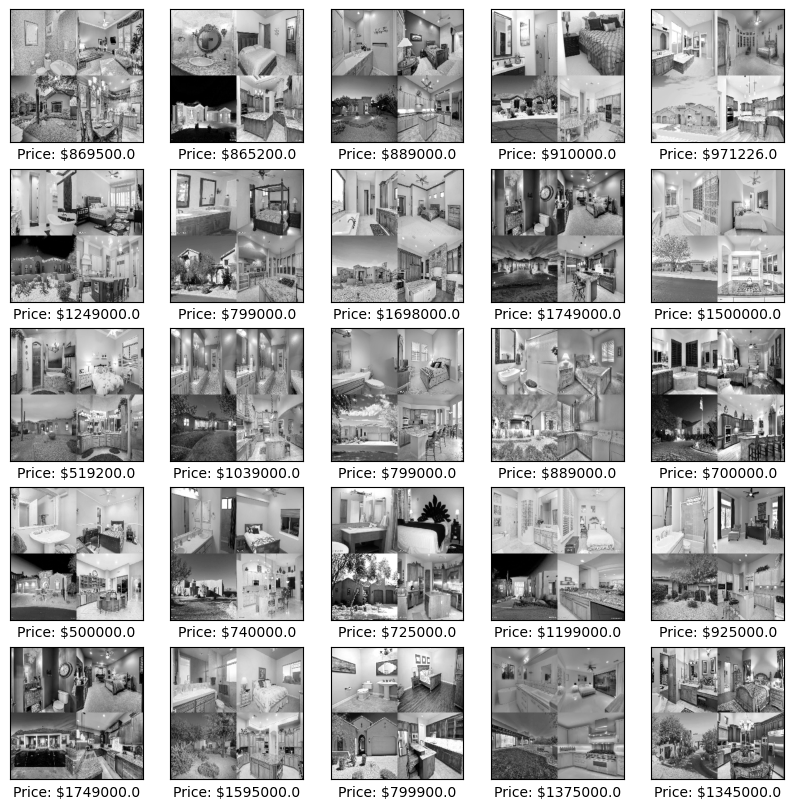

In [88]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(house_images[i, :, :, 0], cmap = plt.cm.gray)
    plt.xlabel("Price: $" + str(house_prices[i]))
plt.show()

In [94]:
reconstructed = autoencoder_model.predict(XtestM[:25, :, :])

1/1 [==============================] - 0s 51ms/step


In [106]:
from keras import layers, models

# Input layer
inputLayer = layers.Input(name="main_input", shape=(XtrainM.shape[1], XtrainM.shape[2], XtrainM.shape[3]))

# Encoder part
tempLayer = layers.Flatten(name="flatten")(inputLayer)
tempLayer = layers.Dense(128, name="first_enc_relu", activation="relu")(tempLayer)
tempLayer = layers.Dense(64, name="second_enc_relu", activation="relu")(tempLayer)
encoded = layers.Dense(16, name="bottleneck", activation="relu")(tempLayer)

# Decoder part
tempLayer = layers.Dense(64, name="first_dec_relu", activation="relu")(encoded)
tempLayer = layers.Dense(128, name="second_dec_relu", activation="relu")(tempLayer)
tempLayer = layers.Dense(XtrainM.shape[1] * XtrainM.shape[2] * XtrainM.shape[3], name="dec_sigmoid", activation="sigmoid")(tempLayer)
decoded = layers.Reshape((XtrainM.shape[1], XtrainM.shape[2], XtrainM.shape[3]), name="reshape")(tempLayer)

autoencoder_model = models.Model(inputs=inputLayer, outputs=decoded)
encoder_model = models.Model(inputs=inputLayer, outputs=encoded)

decoderInput = layers.Input(name="bottleneck_input", shape=(16,))
tempLayer = autoencoder_model.layers[5](decoderInput)
tempLayer = autoencoder_model.layers[6](tempLayer)
tempLayer = autoencoder_model.layers[7](tempLayer)
decoderOutput = autoencoder_model.layers[8](tempLayer)
decoder_model = models.Model(inputs=decoderInput, outputs=decoderOutput)

encoder_model.summary()
autoencoder_model.summary()
decoder_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 256, 256, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 first_enc_relu (Dense)      (None, 128)               25165952  
                                                                 
 second_enc_relu (Dense)     (None, 64)                8256      
                                                                 
 bottleneck (Dense)          (None, 16)                1040      
                                                                 
Total params: 25,175,248
Trainable params: 25,175,248
Non-trainable params: 0
_________________________________________________________________
Model: "model_6"
______________________________

In [107]:
compressed = encoder_model.predict(XtestM)
print(compressed.shape)

4/4 [==============================] - 0s 19ms/step
(107, 16)


In [108]:
reconstructed = decoder_model.predict(compressed)
print(reconstructed.shape)

4/4 [==============================] - 0s 16ms/step
(107, 256, 256, 3)


In [109]:
a = autoencoder_model.get_layer("first_enc_relu").weights[0].numpy()[5, 5]
print(a)
b = encoder_model.get_layer("first_enc_relu").weights[0].numpy()[5, 5]
print(b)

0.0013160049
0.0013160049


In [117]:
inputLayer = Layers.Input(name = "main_input", 
                          shape = (XlearnT.shape[1], 
                                   XlearnT.shape[2],
                                   XlearnT.shape[3]))

#encoder part
tempLayer = Layers.Conv2D(16, 
                          kernel_size = (3, 3), 
                          name = "first_enc_relu", 
                          padding = "same",
                          activation = "relu")(inputLayer)
tempLayer = Layers.BatchNormalization()(tempLayer)
tempLayer = Layers.MaxPool2D((2, 2), padding = "same")(tempLayer)
tempLayer = Layers.Conv2D(32, 
                          kernel_size = (3, 3), 
                          name = "second_enc_relu", 
                          padding = "same",
                          activation = "relu")(tempLayer)
tempLayer = Layers.BatchNormalization()(tempLayer)
tempLayer = Layers.MaxPool2D((2, 2), padding = "same")(tempLayer)
shape_before_bottleneck = tempLayer.shape[1:]

tempLayer = Layers.Flatten()(tempLayer)

encoded = Layers.Dense(16, name = "bottleneck", activation = "relu")(tempLayer)

# decoder part
tempLayer = Layers.Dense(np.prod(shape_before_bottleneck), activation="relu")(encoded)
tempLayer = Layers.Reshape(shape_before_bottleneck)(tempLayer)

tempLayer = Layers.Conv2DTranspose(32, kernel_size=(3, 3), padding="same", activation="relu", strides=2)(tempLayer)
tempLayer = Layers.BatchNormalization()(tempLayer)
tempLayer = Layers.Conv2DTranspose(16, kernel_size=(3, 3), padding="same", activation="relu", strides=2)(tempLayer)
tempLayer = Layers.BatchNormalization()(tempLayer)
decoded = Layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(tempLayer)

autoencoder_model = Model(inputs = inputLayer, outputs = decoded)
encoder_model = Model(inputs = inputLayer, outputs = encoded)

decoderInput = Layers.Input(name = "bottleneck_input",
                            shape = 16)
tempLayer = autoencoder_model.layers[9](decoderInput)
tempLayer = autoencoder_model.layers[10](tempLayer)
tempLayer = autoencoder_model.layers[11](tempLayer)
tempLayer = autoencoder_model.layers[12](tempLayer)
tempLayer = autoencoder_model.layers[13](tempLayer)
tempLayer = autoencoder_model.layers[14](tempLayer)
decoderOutput = autoencoder_model.layers[15](tempLayer)
decoder_model = Model(inputs = decoderInput, outputs = decoderOutput)

encoder_model.summary()
autoencoder_model.summary()
decoder_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 256, 256, 3)]     0         
                                                                 
 first_enc_relu (Conv2D)     (None, 256, 256, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 second_enc_relu (Conv2D)    (None, 128, 128, 32)      4640      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 32)     128

In [118]:
autoencoder_model.compile(loss = "mse", optimizer = "adam")
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                           patience = 3)
autoencoder_history = autoencoder_model.fit(XlearnT, XlearnT,
                                            epochs = 10,
                                            batch_size = 250, 
                                            verbose = 1,
                                            validation_data = (XvalT, XvalT),
                                            callbacks = [early_stop])


Epoch 1/10
2/2 [==============================] - 31s 9s/step - loss: 0.2512 - val_loss: 0.2465
Epoch 2/10
2/2 [==============================] - 26s 8s/step - loss: 0.2464 - val_loss: 0.2449
Epoch 3/10
2/2 [==============================] - 28s 9s/step - loss: 0.2448 - val_loss: 0.2431
Epoch 4/10
2/2 [==============================] - 27s 8s/step - loss: 0.2429 - val_loss: 0.2410
Epoch 5/10
2/2 [==============================] - 27s 9s/step - loss: 0.2407 - val_loss: 0.2386
Epoch 6/10
2/2 [==============================] - 27s 8s/step - loss: 0.2383 - val_loss: 0.2358
Epoch 7/10
2/2 [==============================] - 27s 9s/step - loss: 0.2355 - val_loss: 0.2328
Epoch 8/10
2/2 [==============================] - 26s 8s/step - loss: 0.2324 - val_loss: 0.2293
Epoch 9/10
2/2 [==============================] - 27s 8s/step - loss: 0.2289 - val_loss: 0.2256
Epoch 10/10
2/2 [==============================] - 27s 9s/step - loss: 0.2251 - val_loss: 0.2214


In [121]:
# part A
compressed = encoder_model.predict(XtestT)
print(compressed.shape)
# part B
reconstructed = decoder_model.predict(compressed)
print(reconstructed.shape)

4/4 [==============================] - 1s 123ms/step
(107, 16)
4/4 [==============================] - 1s 235ms/step
(107, 256, 256, 3)
